# PHASE 01 : PREPROCESSING AND CLEANING THE DATA

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np


data = pd.read_csv("car_price.csv")

# first column
# delete the first column : it's like an index column but we already have the index.
data = data.drop(data.columns[0], axis = 1)
data = data.drop(data.columns[7], axis = 1) # this has inacurrate values

# third column
# we unifed the unit of the money here to lakh
for i in range(data.shape[0]) : 
    if 'Lakh' in data.iloc[i, 1] :
        data.iloc[i, 1] = float(data.iloc[i, 1].split()[0])
    elif 'Crore' in data.iloc[i, 1] :
        data.iloc[i, 1] = float(data.iloc[i, 1].split()[0]) * 10
    else : 
        data.iloc[i, 1] = float(float(data.iloc[i, 1].replace(',', ''))/100000)

# change the columns name
data.rename(columns={'car_prices_in_rupee' : 'car_prices_in_Lakh'}, inplace = True)

# fourth column
# we deleted the characters and convert it to an integer
data['kms_driven'] = data['kms_driven'].str.split(" ").str[0]
data['kms_driven'] = data['kms_driven'].str.replace(',', '', regex = False).astype(int)

# fifth column
# we applied one hot encoding to the fuel_type column
onehotencoder = OneHotEncoder(sparse_output=False)
encoded_fifth_column = onehotencoder.fit_transform(data[['fuel_type']])
encoded_fifth_column = pd.DataFrame(encoded_fifth_column, columns=onehotencoder.get_feature_names_out(['fuel_type']))

data = pd.concat([data.drop(columns=['fuel_type']), encoded_fifth_column], axis=1)


# sixth column
# we did one hot encoding for the transmission column
encoded_sixth_column = onehotencoder.fit_transform(data[['transmission']])
encoded_sixth_column = pd.DataFrame(encoded_sixth_column, columns=onehotencoder.get_feature_names_out(['transmission']))

data = pd.concat([data.drop(columns=['transmission']), encoded_sixth_column], axis=1)


# seventh column
# we delted the added characters and converted it to integer
data['ownership'] = data['ownership'].str[0].astype(int)
data['ownership'] = data['ownership'] + 1

# Seats column
# we delted the added characters and converted it to integer
data['Seats'] = data['Seats'].str.split(" ").str[0].astype(int)

In [2]:
# we used TARGET ENCODING here

# Calculate the mean of the target variable for each category in 'car_name'
car_name_target_mean = data.groupby('car_name')['car_prices_in_Lakh'].mean()

# Map the mean values to the 'car_name' column
data['car_name_encoded'] = data['car_name'].map(car_name_target_mean)

# Drop the original 'car_name' column if no longer needed
data = data.drop(columns=['car_name'])

In [3]:
data = data.apply(pd.to_numeric, errors='coerce')  # Convert all columns to numeric, forcing errors to NaN

## understanding the nature of the data (distributions, ...)

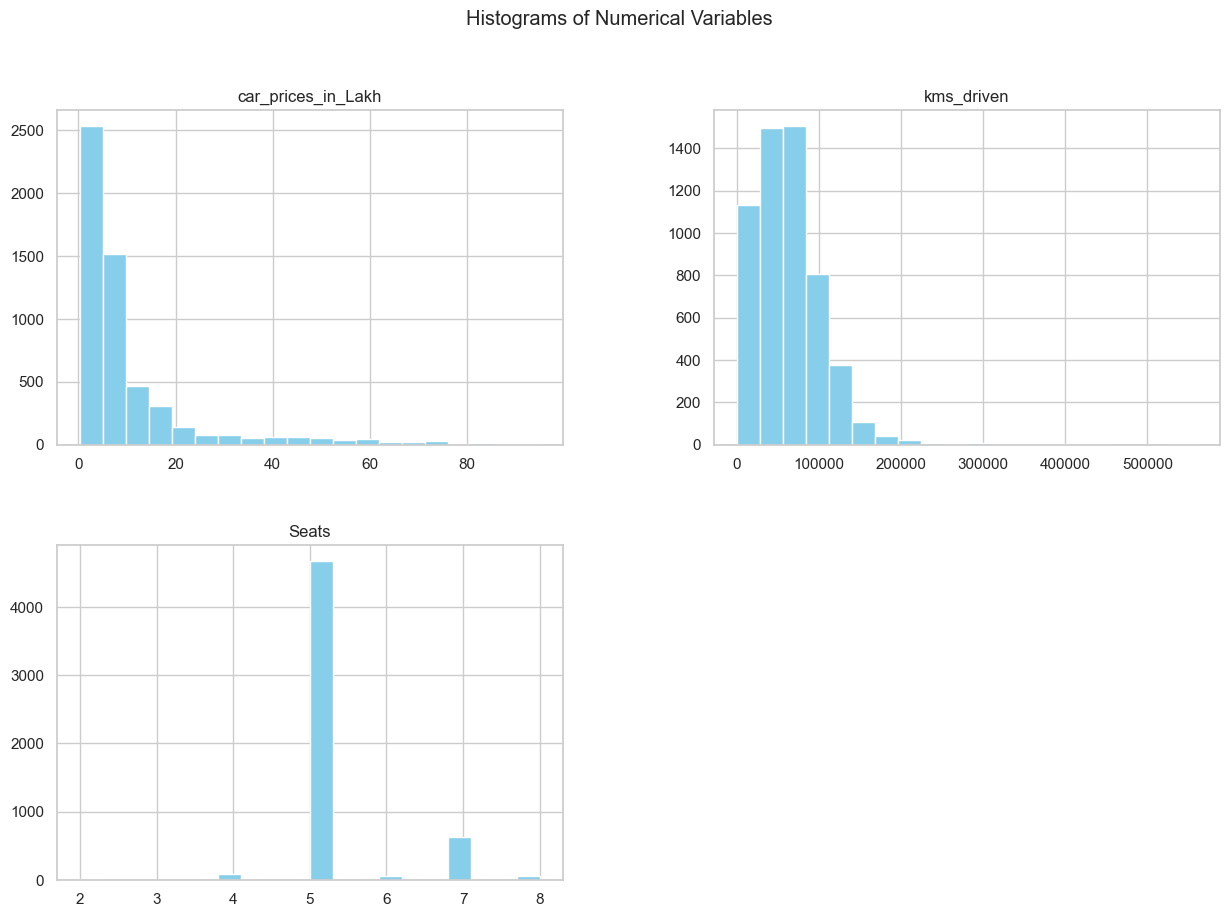

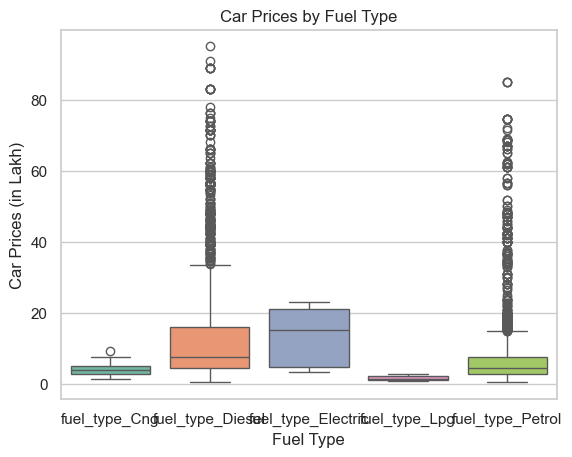

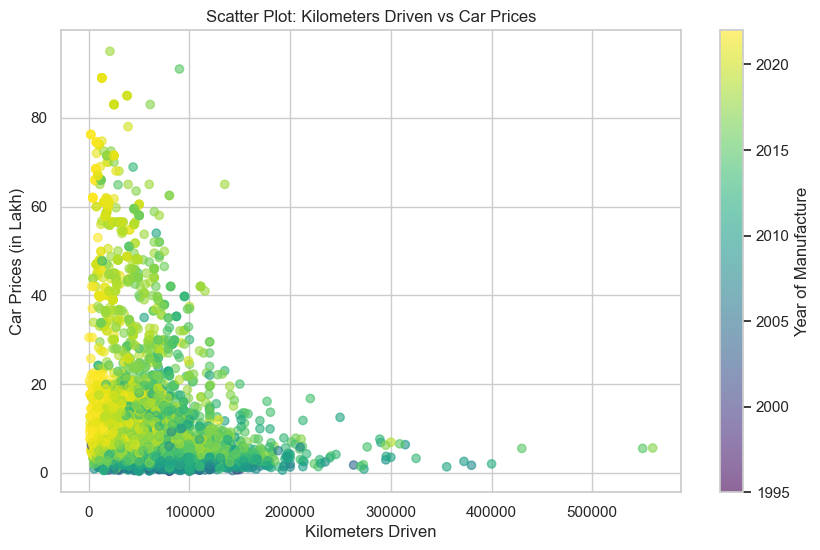

C:\Users\AL-Athir\AppData\Local\Temp\ipykernel_6992\1498807875.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_transmission, palette="Set3")


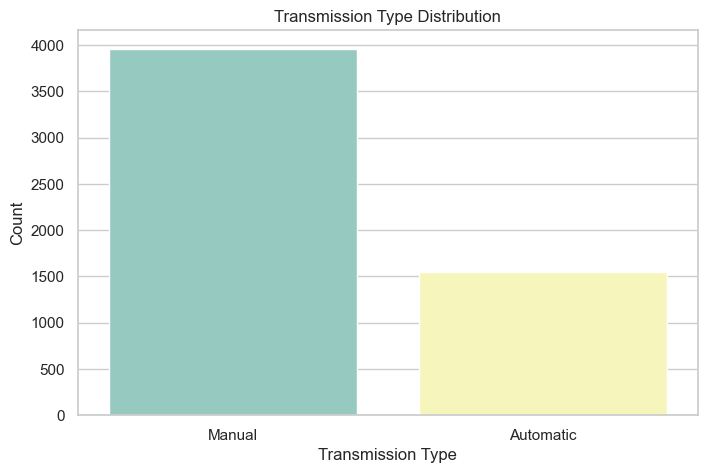

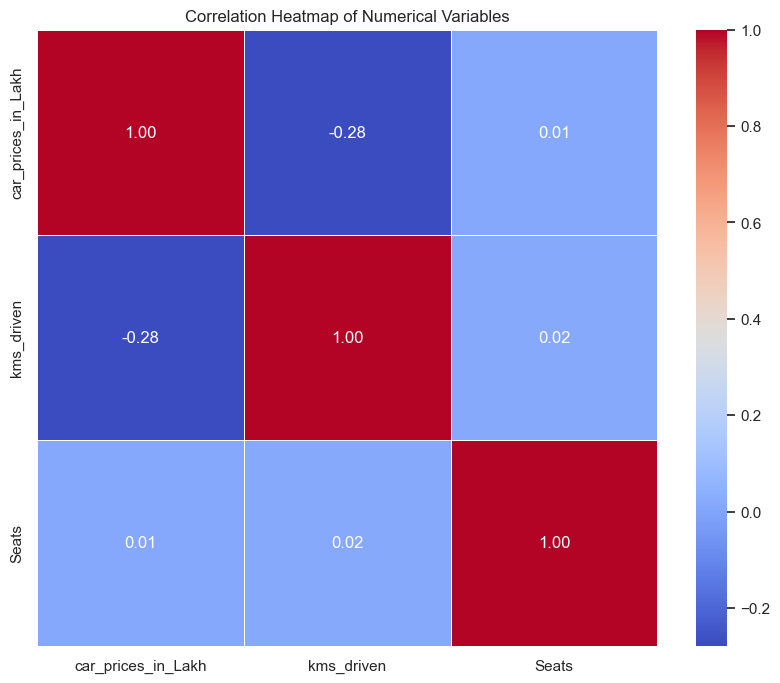

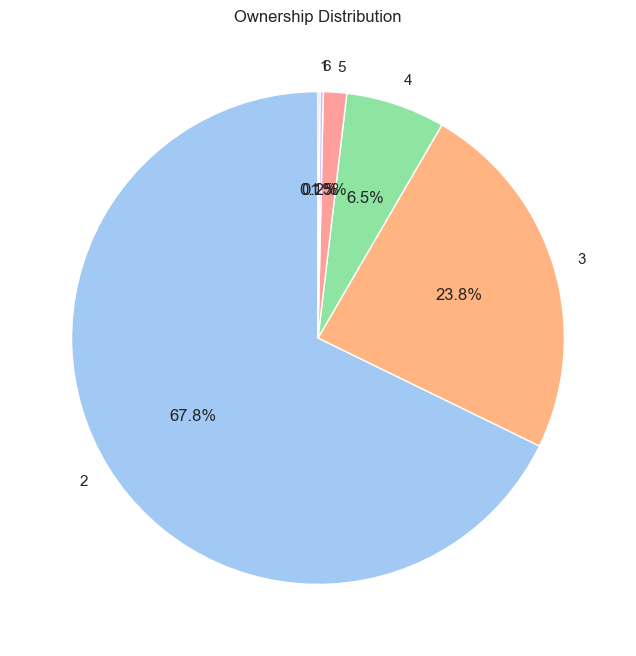

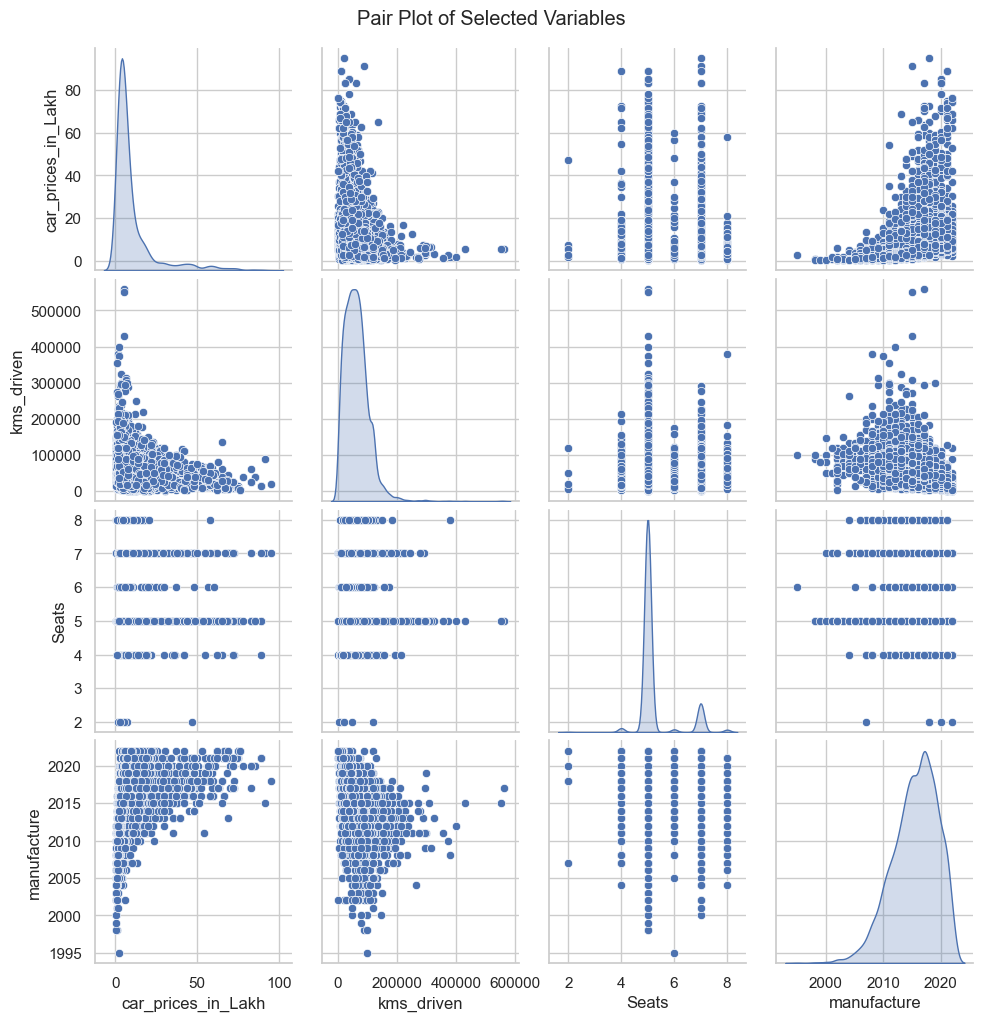

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# 1. Histogram for numerical columns
numerical_columns = ['car_prices_in_Lakh', 'kms_driven', 'Seats']
data[numerical_columns].hist(bins=20, figsize=(15, 10), color='skyblue')
plt.suptitle("Histograms of Numerical Variables")
plt.show()

# 2. Box Plot for car prices by fuel type
fuel_type_columns = ['fuel_type_Cng', 'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Lpg', 'fuel_type_Petrol']
data_melted = data.melt(id_vars=['car_prices_in_Lakh'], value_vars=fuel_type_columns, var_name='Fuel Type', value_name='Is Fuel Type')
data_melted = data_melted[data_melted['Is Fuel Type'] == 1]

sns.boxplot(x='Fuel Type', y='car_prices_in_Lakh', hue='Fuel Type', data=data_melted, palette="Set2", dodge=False)
plt.title("Car Prices by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Car Prices (in Lakh)")
plt.legend([], [], frameon=False)  # Removes redundant legend
plt.show()

# 3. Scatter Plot: Kilometers driven vs Car prices
plt.figure(figsize=(10, 6))
plt.scatter(data['kms_driven'], data['car_prices_in_Lakh'], alpha=0.6, c=data['manufacture'], cmap='viridis')
plt.colorbar(label='Year of Manufacture')
plt.title("Scatter Plot: Kilometers Driven vs Car Prices")
plt.xlabel("Kilometers Driven")
plt.ylabel("Car Prices (in Lakh)")
plt.show()

# 4. Bar Chart: Transmission type counts
transmission_columns = ['transmission_Automatic', 'transmission_Manual']
data_transmission = data[transmission_columns].idxmax(axis=1).str.replace('transmission_', '')

plt.figure(figsize=(8, 5))
sns.countplot(x=data_transmission, palette="Set3")
plt.title("Transmission Type Distribution")
plt.xlabel("Transmission Type")
plt.ylabel("Count")
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

# 6. Pie Chart: Ownership distribution
plt.figure(figsize=(8, 8))
data['ownership'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)
plt.title("Ownership Distribution")
plt.ylabel("")
plt.show()

# 7. Pair Plot for selected variables
selected_columns = ['car_prices_in_Lakh', 'kms_driven', 'Seats', 'manufacture']
sns.pairplot(data[selected_columns], diag_kind="kde")
plt.suptitle("Pair Plot of Selected Variables", y=1.02)
plt.show()




### **1. Histogramme des Colonnes Numériques**  
**Description** :  
Les histogrammes montrent la répartition des données numériques, illustrant comment les valeurs sont réparties sur une plage donnée.  
**Objectif** :  
Identifier les tendances, l’asymétrie ou les anomalies dans les colonnes numériques : `car_prices_in_Lakh`, `kms_driven`, et `Seats`. Par exemple, cela permet d’observer la fréquence des prix des voitures dans des plages spécifiques ou d’identifier le nombre de sièges le plus courant dans les véhicules.  

---

### **2. Boîte à Moustaches des Prix des Voitures par Type de Carburant**  
**Description** :  
Une boîte à moustaches résume la répartition des prix des voitures pour chaque type de carburant. Elle montre la médiane, les quartiles et les valeurs aberrantes potentielles.  
**Objectif** :  
Comparer comment les prix des voitures varient selon les types de carburant (`CNG`, `Diesel`, `Electric`, `LPG` et `Petrol`). Ce graphique aide à identifier quel type de carburant est associé à des prix plus élevés ou plus bas et à observer les plages de prix pour chaque catégorie.  

---

### **3. Nuage de Points : Kilométrage vs Prix des Voitures**  
**Description** :  
Un nuage de points montre la relation entre deux variables numériques, chaque point représentant une entrée de données.  
**Objectif** :  
Analyser la corrélation entre la distance parcourue par une voiture (`kms_driven`) et son prix (`car_prices_in_Lakh`). La couleur des points (selon `manufacture`) ajoute une dimension supplémentaire, permettant d’observer des tendances en fonction de l’année de fabrication.  

---

### **4. Diagramme à Barres : Répartition par Type de Transmission**  
**Description** :  
Un diagramme à barres illustre la fréquence des voitures selon leur type de transmission (`Automatique` ou `Manuelle`).  
**Objectif** :  
Visualiser la répartition des voitures par type de transmission et déterminer lequel est le plus courant dans le jeu de données. Cela permet de comprendre rapidement la prédominance d’une catégorie sur une autre.  

---

### **5. Carte de Chaleur des Corrélations**  
**Description** :  
Une carte de chaleur affiche les corrélations entre les variables numériques sous forme de matrice colorée, avec des annotations pour les valeurs exactes de corrélation.  
**Objectif** :  
Identifier les relations fortes entre les variables. Par exemple, cela met en évidence si `kms_driven` et `car_prices_in_Lakh` sont fortement corrélés (positivement ou négativement), ce qui est utile pour la sélection des caractéristiques dans la modélisation prédictive.  

---

### **6. Diagramme Circulaire : Répartition de la Propriété**  
**Description** :  
Un diagramme circulaire représente les proportions des catégories de propriété dans le jeu de données. Chaque segment montre le pourcentage d’un type spécifique de propriété.  
**Objectif** :  
Comprendre la répartition globale des types de propriété (par exemple, `Premier Propriétaire`, `Deuxième Propriétaire`, etc.). Cela permet d’évaluer la prévalence des voitures neuves par rapport aux voitures d’occasion.  

---

### **7. Pair Plot des Variables Sélectionnées**  
**Description** :  
Un pair plot génère des nuages de points pour toutes les combinaisons possibles des variables sélectionnées et inclut des estimations de densité à noyau (KDE).  
**Objectif** :  
Explorer les relations entre plusieurs variables simultanément, telles que `car_prices_in_Lakh`, `kms_driven`, `Seats` et `manufacture`. Cela permet d’identifier visuellement les schémas et les corrélations potentielles.  

---

# PHASE 02 : LINEAR REGRESSION

In [8]:
import numpy as np

# calculating the coefficients
def moindre_carre(X, Y):
    """
    Solves for the coefficients using the normal equation.
    Assumes X and Y are numpy arrays.
    """
    # Ensure X and Y are of type float64
    X = np.asarray(X, dtype=np.float64)
    Y = np.asarray(Y, dtype=np.float64)

    # Add a column of ones for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Compute the coefficients
    return np.linalg.pinv(X.T @ X) @ X.T @ Y  # Using Moore-Penrose Pseudo-Inverse

def predict(X, coef):
    """
    Predicts the output using the computed coefficients.
    Assumes X is a numpy array and coef includes the intercept term.
    """
    # Ensure X is of type float64
    X = np.asarray(X, dtype=np.float64)

    # Add a column of ones for the intercept term
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    return X @ coef

def r_squared(y_true, y_pred):
    """
    Calculates the R-squared value.
    Assumes y_true and y_pred are numpy arrays.
    """
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def k_fold_cross_validation(k, X, y, random_seed=None):
    """
    Perform k-fold cross-validation using the Normal Equation.
    
    Parameters:
    - k (int): Number of folds for cross-validation.
    - X (numpy array): Feature matrix of shape (n_samples, n_features).
    - y (numpy array): Target vector of shape (n_samples,).
    - random_seed (int, optional): Seed for reproducibility of data shuffling.
    
    Returns:
    - scores (list of float): R-squared scores for each fold.
    """
    # Ensure reproducibility if a seed is provided
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]
    
    # Split data into k folds
    fold_size = len(X) // k
    scores = []
    
    for i in range(k):
        # Define start and end indices of the validation set
        start = i * fold_size
        end = start + fold_size if i < k - 1 else len(X)
        
        # Split into training and validation sets
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)
        
        # Compute coefficients using the normal equation
        coef = moindre_carre(X_train, y_train)
        
        # Predict on the validation set
        y_pred = predict(X_val, coef)
        
        # Calculate R-squared and append to scores
        score = r_squared(y_val, y_pred)
        scores.append(score)
    
    return scores


# Features (X) and target variable (Y)
X = data.drop(data.columns[0], axis=1).to_numpy()  # Ensure this is a numpy array of numeric values
Y = data['car_prices_in_Lakh'].to_numpy()  # Ensure this is a numpy array of numeric values

# Perform 10-fold cross-validation
k = 10
scores = k_fold_cross_validation(k, X, Y)

print(f"R squared Scores for each fold: {scores}")
print(f"Mean R squared score: {np.mean(scores):.4f}")


R squared Scores for each fold: [0.9402540501246094, 0.9657726660323229, 0.9611116512579441, 0.9719229493111975, 0.973453080443421, 0.9446029634885014, 0.9712518944494801, 0.9766177621211114, 0.9594337027256931, 0.905582628891642]
Mean R squared score: 0.9570


# Finding the relationships between each variable and the label

In [9]:
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr

In [10]:
# this function calculates the pearson correlation and returns (pearson correlation, slope, intersept)
def pearson (X, Y) :

    mean_x = sum(X) / len(X)
    mean_y = sum(Y) / len(X)


    
    # Step 1: Calculate the covariance matrix
    cov_matrix = np.cov(X, Y)

    # Step 2: Extract Cov(X, Y) from the covariance matrix
    cov_XY = cov_matrix[0, 1]
    
    # Step 3: Calculate the standard deviations of X and Y
    std_X = np.std(X, ddof=1)  # Use ddof=1 for sample standard deviation
    std_Y = np.std(Y, ddof=1)
    
    # Step 4: Compute the result
    result = cov_XY / (std_X * std_Y)

    a = cov_XY / (std_X*std_X)
    b = mean_y - a * mean_x
    
    return result, a, b

In [11]:
"""this function finds the best ajustement for a feature and the label, it returns the graph and the r squared of each of these ajustements :
    linear
    polynomial
    reciprocal
    logarithmique
    exponential
    power
"""
def relationship(X, Y):
    # Initialize a figure with subplots
    fig, axs = plt.subplots(3, 2, figsize=(15, 12))  # 3 rows, 2 columns
    axs = axs.flatten()  # Flatten to easily access individual axes

    # Min-Max Scaling with offset to avoid zeros
    epsilon = 1e-6  # Small positive value
    scaler_X = MinMaxScaler(feature_range=(epsilon, 1))  # Scale to [epsilon, 1]
    scaler_Y = MinMaxScaler(feature_range=(epsilon, 1))

    X = scaler_X.fit_transform(np.array(X).reshape(-1, 1)).flatten()
    Y = scaler_Y.fit_transform(np.array(Y).reshape(-1, 1)).flatten()
    
    # Transform the data
    X_linear = X.tolist()
    Y_linear = Y.tolist()
    
    X_ln = [math.log(item) for item in X_linear]
    Y_ln = [math.log(item) for item in Y_linear]
    dividing = [1 / (item**0.01) for item in X_linear]

    # 1/X relationship
    divided = pearson(dividing, Y_linear)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = [(1 / item**0.01) * divided[1] + divided[2] for item in x_vals]
    axs[0].scatter(X, Y, color='blue')
    axs[0].plot(x_vals, y_vals, color='red')
    axs[0].set_title("1/X Relationship")
    axs[0].text(0.05, 0.9, f"$R$: {divided[0]:.3f}", transform=axs[0].transAxes)

    # Linear regression
    linear_regression = pearson(X_linear, Y_linear)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = [item * linear_regression[1] + linear_regression[2] for item in x_vals]
    axs[1].scatter(X, Y, color='blue')
    axs[1].plot(x_vals, y_vals, color='red')
    axs[1].set_title("Linear Regression")
    axs[1].text(0.05, 0.9, f"$R$: {linear_regression[0]:.3f}", transform=axs[1].transAxes)

    # Exponential relationship
    expo = pearson(X_linear, Y_ln)
    x_vals = np.linspace(min(X_linear), max(X_linear), 100)
    y_vals = [math.exp(expo[2]) * math.exp(expo[1] * item) for item in x_vals]
    axs[2].scatter(X, Y, color='blue')
    axs[2].plot(x_vals, y_vals, color='red')
    axs[2].set_title("Exponential Relationship")
    axs[2].text(0.05, 0.9, f"$R$: {expo[0]:.3f}", transform=axs[2].transAxes)

    # Logarithmic relationship
    ln = pearson(X_ln, Y_linear)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = [np.exp(item) * ln[1] + ln[2] for item in x_vals]
    axs[3].scatter(X, Y, color='blue')
    axs[3].plot(x_vals, y_vals, color='red')
    axs[3].set_title("Logarithmic Relationship")
    axs[3].text(0.05, 0.9, f"$R$: {ln[0]:.3f}", transform=axs[3].transAxes)

    # Power relationship
    puissance = pearson(X_ln, Y_ln)
    x_vals = np.linspace(X.min(), X.max(), 100)
    y_vals = [math.exp(puissance[2]) * (item**math.exp(puissance[1])) for item in x_vals]
    axs[4].scatter(X, Y, color='blue')
    axs[4].plot(x_vals, y_vals, color='red')
    axs[4].set_title("Power Relationship")
    axs[4].text(0.05, 0.9, f"$R$: {puissance[0]:.3f}", transform=axs[4].transAxes)

    # Polynomial regression (degree 2)
    poly_transformer = PolynomialFeatures(degree=2)
    X_poly = poly_transformer.fit_transform(pd.DataFrame(X))
    
    lr_model = LinearRegression()
    lr_model.fit(X_poly, Y)
    y_pred = lr_model.predict(X_poly)

    # Calculate Pearson correlation coefficient
    pearson_corr, _ = pearsonr(Y, y_pred)
    
    X_range = pd.DataFrame(np.linspace(X.min(), X.max(), 100))
    X_range_poly = poly_transformer.fit_transform(X_range)
    y_range = lr_model.predict(X_range_poly)
    
    axs[5].scatter(X, Y, color='blue')
    axs[5].plot(X_range, y_range, color='red', linewidth=2)
    axs[5].set_title("Polynomial Regression (degree 2)")
    axs[5].text(0.05, 0.9, f"$R$: {pearson_corr:.3f}", transform=axs[5].transAxes)

    # Adjust layout
    plt.tight_layout()
    plt.show()


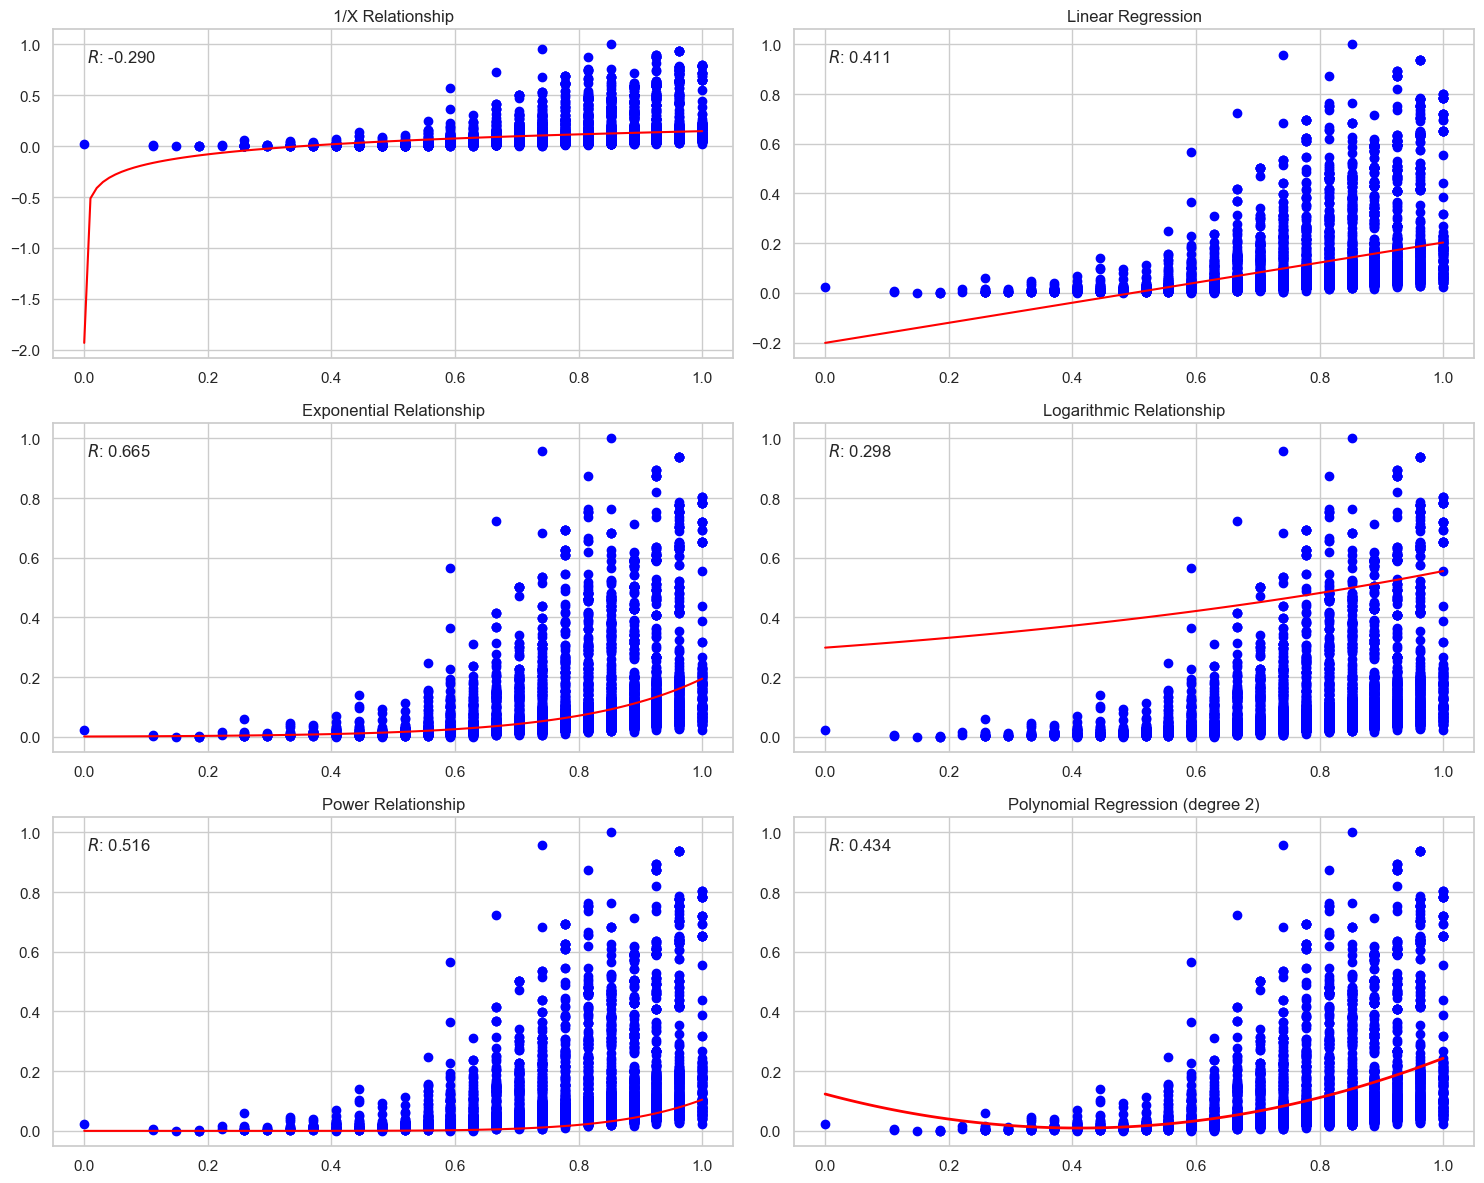

In [12]:
relationship(data['manufacture'], data['car_prices_in_Lakh'])

### here the best ajustment that captures the relationship is the exponential relationship with an R squared of 0.665

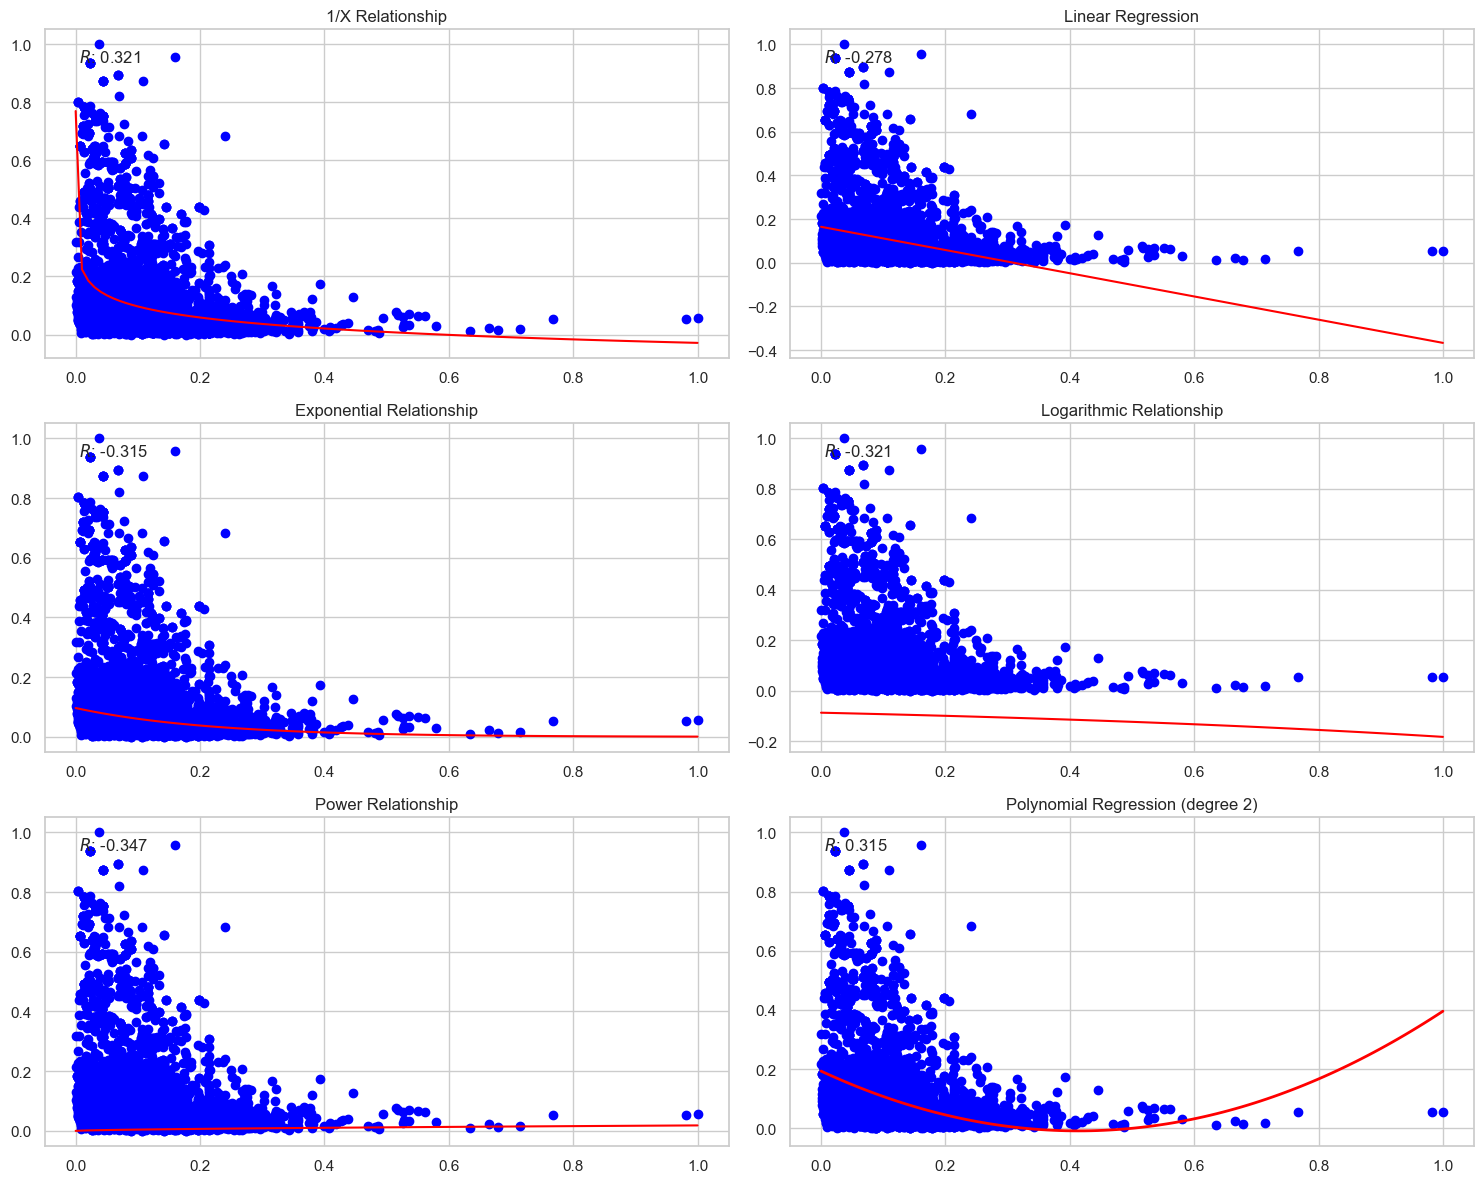

In [13]:
relationship(data['kms_driven'], data['car_prices_in_Lakh'])

### here is the best ajustement is the reciprocal relationship with an R squared of 0.321

# Creating the non linear model

it will be like this : y = a0 + a1 / (x1) + a2 * x2 + b3 * exp(a3*x3) + a4 * x4 + a5 * x5 + ... + a13 * x13

we didn't use polynomial ajustement it gives bad results (it have a small or a negative R squared)

## using gradient descent from scratch

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [15]:
def gradient_descent_custom(X, y, learning_rate=0.01, max_iter=1000, tolerance=1e-6):
    """
    Perform gradient descent to find coefficients for a regression model
    with custom non-linear transformations for specific variables.

    Parameters:
        X (ndarray): Feature matrix (with bias column).
        y (ndarray): Target values.
        learning_rate (float): Step size for gradient descent.
        max_iter (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance.

    Returns:
        ndarray: Optimized coefficients.
    """
    n_samples, n_features = X.shape

    # Initialize coefficients
    coefficients = np.zeros(n_features + 1)  # Additional coefficient for b3

    for iteration in range(max_iter):
        # Compute predictions
        linear_part = np.dot(X[:, [0] + list(range(2, n_features))], coefficients[[0] + list(range(2, n_features))])
        nonlinear_part_1 = coefficients[1] / X[:, 1]  # a1 / x1 (because the bias is the first one)
        nonlinear_part_3 = coefficients[n_features] * np.exp(coefficients[3] * X[:, 3])  # b3 * exp(a3 * x3)
        predictions = linear_part + nonlinear_part_1 + nonlinear_part_3

        # Compute residuals
        residuals = predictions - y

        # Compute gradients
        gradients = np.zeros(n_features + 1)
        gradients[[0] + list(range(2, n_features))] = (2 / n_samples) * np.dot(X[:, [0] + list(range(2, n_features))].T, residuals)
        gradients[1] = -(2 / n_samples) * np.sum(residuals * coefficients[1] / (X[:, 1] ** 2))  # Gradient for a1 / x1
        gradients[3] = (2 / n_samples) * np.sum(residuals * X[:, 3] * coefficients[n_features] * np.exp(coefficients[3] * X[:, 3]))  # Gradient for a3
        gradients[n_features] = (2 / n_samples) * np.sum(residuals * np.exp(coefficients[3] * X[:, 3]))  # Gradient for b3

        # Update coefficients
        coefficients -= learning_rate * gradients

        # Check for convergence
        if np.linalg.norm(gradients) < tolerance:
            print(f"Converged in {iteration} iterations.")
            break

    return coefficients





### **Fonction `gradient_descent_custom`**  
**Description** :  
Cette fonction exécute une descente de gradient pour ajuster les coefficients d’un modèle de régression avec des transformations non linéaires personnalisées pour certaines variables.  

**Paramètres** :  
- `X (ndarray)` : La matrice des caractéristiques, incluant une colonne de biais pour les coefficients.  
- `y (ndarray)` : Les valeurs cibles.  
- `learning_rate (float)` : Le taux d’apprentissage, c’est-à-dire la taille du pas pour chaque itération de la descente de gradient.  
- `max_iter (int)` : Le nombre maximal d’itérations à exécuter.  
- `tolerance (float)` : Le critère de convergence, basé sur la norme des gradients.  

**Retour** :  
- `ndarray` : Les coefficients optimisés du modèle.  

---

### **Étapes Principales**  

1. **Initialisation des Coefficients** :  
   Tous les coefficients sont initialisés à 0. Cela inclut un coefficient supplémentaire pour le terme non linéaire \( b_3 \).  

2. **Calcul des Prédictions** :  
   - **Partie Linéaire** : On multiplie les caractéristiques sélectionnées par leurs coefficients respectifs.  
   - **Partie Non Linéaire** :  
     - \( \frac{a_1}{x_1} \) : Transformation non linéaire de la première caractéristique.  
     - \( b_3 \cdot \exp(a_3 \cdot x_3) \) : Transformation exponentielle appliquée à une autre caractéristique.  
   Les prédictions sont obtenues en additionnant ces trois parties.  

3. **Calcul des Résidus** :  
   Les résidus sont la différence entre les prédictions et les valeurs cibles \( y \).  

4. **Calcul des Gradients** :  
   Les gradients de la fonction de coût sont calculés pour chaque coefficient :  
   - Les termes linéaires utilisent le produit matriciel standard.  
   - Pour \( \frac{a_1}{x_1} \), la dérivée prend en compte la transformation inverse \( x_1^{-2} \).  
   - Pour \( b_3 \cdot \exp(a_3 \cdot x_3) \), la dérivée inclut les termes exponentiels et multiplicatifs.  

5. **Mise à Jour des Coefficients** :  
   Les coefficients sont mis à jour à chaque itération en soustrayant le produit du gradient et du taux d’apprentissage.  

6. **Critère de Convergence** :  
   La descente de gradient s’arrête si la norme des gradients devient inférieure à la tolérance définie ou si le nombre maximal d’itérations est atteint.  

**Exemple d’Utilisation** :  
```python
coefficients = gradient_descent_custom(X, y, learning_rate=0.01, max_iter=1000, tolerance=1e-6)
print("Coefficients optimisés :", coefficients)
```



In [16]:
def k_fold_cross_validation_custom(k, X, y, learning_rate=0.01, max_iter=1000, tolerance=1e-6, random_seed=None):
    """
    Perform k-fold cross-validation using a custom gradient descent model.

    Parameters:
        k (int): Number of folds for cross-validation.
        X (numpy array): Feature matrix of shape (n_samples, n_features).
        y (numpy array): Target vector of shape (n_samples,).
        learning_rate (float): Step size for gradient descent.
        max_iter (int): Maximum number of iterations for gradient descent.
        tolerance (float): Convergence tolerance for gradient descent.
        random_seed (int, optional): Seed for reproducibility of data shuffling.

    Returns:
        scores (list of float): R-squared scores for each fold.
    """
    # Ensure reproducibility if a seed is provided
    if random_seed is not None:
        np.random.seed(random_seed)

    # Shuffle the data
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X, y = X[indices], y[indices]

    # Split data into k folds
    fold_size = len(X) // k
    scores = []

    for i in range(k):
        # Define start and end indices of the validation set
        start = i * fold_size
        end = start + fold_size if i < k - 1 else len(X)

        # Split into training and validation sets
        X_val, y_val = X[start:end], y[start:end]
        X_train = np.concatenate([X[:start], X[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)

        # Train the model using gradient descent
        coefficients = gradient_descent_custom(X_train, y_train, learning_rate, max_iter, tolerance)

        # Predict on the validation set
        linear_part = np.dot(X_val[:, [0] + list(range(2, X_val.shape[1]))], coefficients[[0] + list(range(2, X_val.shape[1]))])
        nonlinear_part_1 = coefficients[1] / X_val[:, 1]
        nonlinear_part_3 = coefficients[X_val.shape[1]] * np.exp(coefficients[3] * X_val[:, 3])
        y_val_pred = linear_part + nonlinear_part_1 + nonlinear_part_3

        # Calculate R-squared and append to scores
        score = r2_score(y_val, y_val_pred)
        scores.append(score)

    return scores



Cette fonction implémente une validation croisée en `k` plis pour un modèle de descente de gradient personnalisé. Elle divise les données en `k` plis et effectue l'entraînement et la validation sur chaque pli.

1. **Mélange des données** : Les données sont mélangées de manière aléatoire pour s'assurer que chaque pli obtient un sous-ensemble différent des données, ce qui aide à réduire les biais dans l'évaluation du modèle. Si un `random_seed` est fourni, il garantit la reproductibilité en fixant la graine aléatoire.

2. **Division des données** : Le jeu de données est divisé en `k` plis, chaque pli étant utilisé une fois comme ensemble de validation, tandis que les autres données sont utilisées pour l'entraînement.

3. **Descente de gradient** : Pour chaque pli, le modèle est entraîné à l'aide de la fonction de descente de gradient personnalisée (`gradient_descent_custom`). Cette fonction retourne les coefficients du modèle de régression après optimisation.

4. **Prédiction** : Après l'entraînement du modèle, des prédictions sont effectuées sur l'ensemble de validation en utilisant les coefficients appris. Les composants linéaires et non linéaires sont calculés séparément en fonction de la structure du modèle.

5. **Évaluation du modèle** : Le score R-carré (qui mesure la qualité de l'ajustement) est calculé pour les prédictions sur l'ensemble de validation. Ce score est stocké pour chaque pli afin de suivre les performances sur différents plis.

6. **Retour** : La fonction retourne une liste de scores R-carré pour chaque pli, offrant une évaluation globale de la performance du modèle sur les données fournies.

Cette implémentation permet d'évaluer de manière robuste les performances d'un modèle, car elle garantit que chaque point de données est utilisé à la fois pour l'entraînement et la validation, fournissant ainsi une mesure plus fiable de la capacité de généralisation du modèle.


In [17]:
# Standardize features
scaler = StandardScaler()
X = data.drop(data.columns[0], axis=1).values
X_scaled = scaler.fit_transform(X)
X_scaled = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])  # Add bias column

Y = data['car_prices_in_Lakh'].values

# Perform k-fold cross-validation
k = 10
scores = k_fold_cross_validation_custom(k, X_scaled, Y, learning_rate=0.01, max_iter=1000, tolerance=1e-6, random_seed=42)

print(f"R squared Scores for each fold: {scores}")
print(f"Mean R squared score: {np.mean(scores):.4f}")

R squared Scores for each fold: [0.969941713322419, 0.9769021867412795, 0.9338918828810197, 0.9435786243759986, 0.9741381705098151, 0.9235922557574024, 0.97274055396724, 0.9737603072056166, 0.9771228736663264, 0.9289880346269651]
Mean R squared score: 0.9575


# Polynomial Regression

In [18]:
import numpy as np

# Generate polynomial features
def generate_polynomial_features(X, degree):
    """
    Expands the input features into polynomial features up to a given degree.
    
    Parameters:
    - X (numpy array): Original feature matrix of shape (n_samples, n_features).
    - degree (int): Degree of the polynomial.
    
    Returns:
    - poly_features (numpy array): Polynomial features of shape (n_samples, n_features * degree).
    """
    poly_features = X.copy()
    for d in range(2, degree + 1):
        poly_features = np.hstack((poly_features, X ** d))
    return poly_features

# Modified main function to use polynomial regression
def polynomial_regression(k, X, y, degree, random_seed=None):
    """
    Perform k-fold cross-validation for polynomial regression.
    
    Parameters:
    - k (int): Number of folds for cross-validation.
    - X (numpy array): Feature matrix of shape (n_samples, n_features).
    - y (numpy array): Target vector of shape (n_samples,).
    - degree (int): Degree of the polynomial features.
    - random_seed (int, optional): Seed for reproducibility of data shuffling.
    
    Returns:
    - scores (list of float): R-squared scores for each fold.
    """
    # Generate polynomial features
    X_poly = generate_polynomial_features(X, degree)
    
    # Ensure reproducibility if a seed is provided
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # Shuffle the data
    indices = np.arange(X_poly.shape[0])
    np.random.shuffle(indices)
    X_poly, y = X_poly[indices], y[indices]
    
    # Split data into k folds
    fold_size = len(X_poly) // k
    scores = []
    
    for i in range(k):
        # Define start and end indices of the validation set
        start = i * fold_size
        end = start + fold_size if i < k - 1 else len(X_poly)
        
        # Split into training and validation sets
        X_val, y_val = X_poly[start:end], y[start:end]
        X_train = np.concatenate([X_poly[:start], X_poly[end:]], axis=0)
        y_train = np.concatenate([y[:start], y[end:]], axis=0)
        
        # Compute coefficients using the normal equation
        coef = moindre_carre(X_train, y_train)
        
        # Predict on the validation set
        y_pred = predict(X_val, coef)
        
        # Calculate R-squared and append to scores
        score = r_squared(y_val, y_pred)
        scores.append(score)
    
    return scores

# Example usage
# Features (X) and target variable (Y)
X = data.drop(data.columns[0], axis=1).to_numpy()
Y = data['car_prices_in_Lakh'].to_numpy()



# Perform 10-fold cross-validation
k = 10

# degree 2

scores = polynomial_regression(k, X, Y, 2)

print(f"R squared Scores for each fold: {scores}")
print(f"Mean R squared score: {np.mean(scores):.4f}")

# degree 3

scores = polynomial_regression(k, X, Y, 3)

print(f"R squared Scores for each fold: {scores}")
print(f"Mean R squared score: {np.mean(scores):.4f}")

# degree 4

scores = polynomial_regression(k, X, Y, 4)

print(f"R squared Scores for each fold: {scores}")
print(f"Mean R squared score: {np.mean(scores):.4f}")



R squared Scores for each fold: [0.8801099124382533, 0.8547083574326815, 0.8206342495602601, 0.8666875270537556, 0.8618575609303029, 0.869166419174891, 0.8681250253308113, 0.8169730724754788, 0.8085645026910709, 0.8797240328764605]
Mean R squared score: 0.8527
R squared Scores for each fold: [0.06741503675902427, 0.07294592397198607, 0.0604495703027047, 0.05243040730363646, 0.07087194326535418, -0.014956179048468021, 0.06297225021083086, 0.04427905616514338, 0.04078620060049798, 0.06913336226148448]
Mean R squared score: 0.0526
R squared Scores for each fold: [-0.6299051331097836, -0.5322582458370457, -3.020271460614622, -0.491146946955757, -0.523973493092577, -0.5365255300652718, -0.5184327087714782, -0.5495443193967247, -0.5522060175559789, -0.6357774991770473]
Mean R squared score: -0.7990


Cette fonction implémente une régression polynomiale avec validation croisée en `k` plis, en générant des caractéristiques polynomiales à partir des données d'entrée. Voici une explication du processus :

1. **Génération des caractéristiques polynomiales** : La fonction `generate_polynomial_features` prend en entrée les caractéristiques originales `X` et un degré `degree`, puis crée de nouvelles caractéristiques en élevant chaque colonne de `X` à des puissances successives (de 1 à `degree`). Cela permet de capturer des relations non linéaires entre les variables.

2. **Validation croisée** : La fonction `polynomial_regression` effectue une validation croisée en `k` plis pour évaluer la performance du modèle sur des sous-ensembles distincts de données. Les données sont mélangées pour garantir que chaque pli est un sous-ensemble représentatif de l'ensemble complet.

3. **Entraînement et évaluation du modèle** : Pour chaque pli, le modèle est entraîné sur un ensemble de données d'apprentissage et évalué sur un ensemble de validation. Les coefficients sont calculés à l'aide de la méthode des moindres carrés, et les prédictions sont effectuées pour l'ensemble de validation. Le score `R^2` est calculé pour chaque pli afin de mesurer la performance du modèle.

4. **Calcul du score R-squared** : Le score `R^2` (coefficient de détermination) est utilisé pour évaluer la qualité de l'ajustement du modèle aux données. Il mesure la proportion de la variance expliquée par le modèle.

5. **Affichage des résultats** : Après avoir effectué la validation croisée sur chaque pli, la fonction affiche les scores `R^2` pour chaque pli, ainsi que la moyenne de ces scores, ce qui donne une évaluation globale de la performance du modèle sur les différentes configurations de données.

Cette méthode permet de tester la capacité de généralisation du modèle de régression polynomiale avec différentes puissances et de s'assurer que les performances ne sont pas simplement dues à un surajustement sur un sous-ensemble particulier des données.


As you can see the polynomial model in not good in this  case because we the R^2 is negative. we can tell that this model doesn't fit to our data, so it is better to use a lineare regression model or a non linear one

# Ridge

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

def ridge_regression(X, y, lambd):
    """
    Implémente la régression Ridge en suivant l'équation normale.

    Entrées :
    - X : Matrice des caractéristiques (n x p)
    - y : Vecteur des valeurs cibles (n,)
    - lambd : Paramètre de régularisation (λ)

    Sortie :
    - θ : Vecteur des coefficients (p + 1,)
    """
    # Étape 1 : Ajouter une colonne de biais (intercepte)
    X = np.c_[np.ones(X.shape[0]), X]

    # Étape 2 : Calculer la matrice Ridge
    n_features = X.shape[1]
    XT_X = X.T @ X
    Ridge_Matrix = XT_X + lambd * np.eye(n_features)
    
    # Exclure la régularisation pour le biais (premier élément)
    Ridge_Matrix[0, 0] -= lambd

    # Étape 3 : Calculer θ
    theta = np.linalg.inv(Ridge_Matrix) @ X.T @ y
    return theta

def cross_validation(X, y, lambdas, k_folds=5):
    """
    Implémente la validation croisée pour choisir le meilleur λ pour la régression Ridge.

    Entrées :
    - X : Matrice des caractéristiques (n x p)
    - y : Vecteur des valeurs cibles (n,)
    - lambdas : Liste des valeurs de λ à tester
    - k_folds : Nombre de plis pour la validation croisée

    Sortie :
    - best_lambda : La meilleure valeur de λ
    """
    n_samples = X.shape[0]
    fold_size = n_samples // k_folds
    errors = []

    for lambd in lambdas:
        fold_errors = []
        for fold in range(k_folds):
            # Indices pour les ensembles d'entraînement et de validation
            val_indices = list(range(fold * fold_size, (fold + 1) * fold_size))
            train_indices = list(set(range(n_samples)) - set(val_indices))
            
            # Création des ensembles
            X_train, X_val = X[train_indices], X[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
            
            # Entraînement du modèle Ridge
            theta = ridge_regression(X_train, y_train, lambd)
            
            # Ajout de la colonne de biais à X_val
            X_val_with_bias = np.c_[np.ones(X_val.shape[0]), X_val]
            
            # Calcul des prédictions
            y_pred = X_val_with_bias @ theta
            
            # Calcul de l'erreur quadratique moyenne
            mse = np.mean((y_val - y_pred) ** 2)
            fold_errors.append(mse)
        
        # Erreur moyenne pour ce λ
        errors.append(np.mean(fold_errors))

    # Choisir la meilleure valeur de λ
    best_lambda = lambdas[np.argmin(errors)]
    return best_lambda

# Chargement et préparation des données

X = data.drop(columns=['car_prices_in_Lakh']).values  # Caractéristiques
y = data['car_prices_in_Lakh'].values  # Cible

# Standardisation avec bibliothèque
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste des valeurs de λ à tester
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

# Trouver le meilleur λ
best_lambda = cross_validation(X_scaled, y, lambdas, k_folds=5)
print("Meilleur λ :", best_lambda)

# Entraîner le modèle avec le meilleur λ
theta_best = ridge_regression(X_scaled, y, best_lambda)
print("Coefficients Ridge avec meilleur λ :", theta_best)

Meilleur λ : 10
Coefficients Ridge avec meilleur λ : [ 1.02568090e+01 -2.59297413e-01 -1.32913326e-01  1.91040966e-01
  8.14778149e-02 -1.50252219e-02  6.29896880e-02 -2.44620027e-02
  1.96569387e-02 -5.94411257e-02  8.38091889e-03 -8.38091889e-03
  1.29974402e+01]


1. **Régression Ridge** : La fonction `ridge_regression` implémente la régression Ridge en utilisant l'équation normale. Elle ajoute une colonne de biais à la matrice des caractéristiques, calcule la matrice de Ridge (en incluant le paramètre de régularisation λ), puis résout l'équation normale pour obtenir les coefficients optimaux.

2. **Validation croisée** : La fonction `cross_validation` effectue une validation croisée en `k` plis pour déterminer le meilleur paramètre de régularisation λ. Elle divise les données en plis, entraîne un modèle Ridge sur chaque sous-ensemble d'entraînement, évalue l'erreur sur le sous-ensemble de validation, et sélectionne la valeur de λ qui minimise l'erreur quadratique moyenne (MSE).

3. **Standardisation** : Avant de procéder à la régression Ridge, les caractéristiques sont standardisées à l'aide de `StandardScaler` de `sklearn` pour garantir que toutes les variables ont une échelle comparable.

4. **Sélection de λ et entraînement du modèle** : Après avoir identifié le meilleur λ par validation croisée, le modèle Ridge est réentraîné avec cette valeur optimale de λ, et les coefficients finaux sont affichés.



# Lasso


In [20]:
import numpy as np

class LassoRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, lambda_param=0.1):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.lambda_param = lambda_param

    def fit(self, X, y):
        # Initialize weights and bias
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        
        # Gradient Descent
        for i in range(self.iterations):
            self._update_weights(X, y)

    def _update_weights(self, X, y):
        # Predictions
        y_pred = self.predict(X)
        
        # Compute gradients
        dw = np.zeros(self.n)
        for j in range(self.n):
            gradient = -2 * np.dot(X[:, j], (y - y_pred)) / self.m
            if self.w[j] > 0:
                dw[j] = gradient + self.lambda_param / self.m
            elif self.w[j] < 0:
                dw[j] = gradient - self.lambda_param / self.m
            else:
                dw[j] = gradient

        db = -2 * np.sum(y - y_pred) / self.m
        
        # Update weights and bias
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def predict(self, X):
        # Linear model
        return np.dot(X, self.w) + self.b

    def get_coefficients(self):
        # Return the weights and bias
        return self.w, self.b

    @staticmethod
    def cross_validate(X, y, lambdas, k=5, learning_rate=0.01, iterations=1000):
        best_lambda = None
        best_score = float('inf')

        def split_data(X, y, k):
            n_samples = len(X)
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            fold_size = n_samples // k

            folds = []
            for i in range(k):
                start = i * fold_size
                end = start + fold_size if i != k - 1 else n_samples
                folds.append(indices[start:end])
            return folds

        folds = split_data(X, y, k)

        for lambda_param in lambdas:
            scores = []

            for i in range(k):
                val_indices = folds[i]
                train_indices = np.hstack([folds[j] for j in range(k) if j != i])

                X_train, X_val = X[train_indices], X[val_indices]
                y_train, y_val = y[train_indices], y[val_indices]

                model = LassoRegression(learning_rate=learning_rate, iterations=iterations, lambda_param=lambda_param)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_val)

                score = np.mean((y_val - y_pred) ** 2)  # Mean Squared Error
                scores.append(score)

            avg_score = np.mean(scores)

            if avg_score < best_score:
                best_score = avg_score
                best_lambda = lambda_param

        return best_lambda



1. **Classe LassoRegression** : La classe `LassoRegression` implémente la régression Lasso avec la régularisation L1. Elle utilise la descente de gradient pour ajuster les coefficients du modèle en fonction de l'erreur quadratique moyenne, avec une pénalisation L1 ajoutée aux gradients des poids.

2. **Méthode `fit`** : La méthode `fit` entraîne le modèle en ajustant les poids (`w`) et le biais (`b`) en fonction des données d'entraînement. La mise à jour des poids se fait à l'aide de la descente de gradient, où chaque poids est ajusté en fonction de la dérivée de la fonction de perte (erreur quadratique) et de la régularisation L1.

3. **Méthode `_update_weights`** : Cette méthode met à jour les poids et le biais en calculant les gradients pour chaque poids et en appliquant la régularisation L1. La régularisation est ajoutée ou soustraite en fonction du signe du poids, ce qui impose une "poussée" vers zéro.

4. **Méthode `predict`** : Cette méthode effectue une prédiction en calculant la combinaison linéaire des caractéristiques pondérées par les poids, plus le biais.

5. **Méthode `cross_validate`** : La méthode `cross_validate` effectue une validation croisée pour trouver le meilleur paramètre de régularisation (λ). Elle divise les données en `k` plis et évalue les performances du modèle pour chaque valeur de λ. Elle utilise l'erreur quadratique moyenne pour évaluer la performance du modèle sur les ensembles de validation et sélectionne la valeur de λ qui minimise cette erreur.

6. **Sélection du meilleur λ** : Le modèle est entraîné et évalué pour chaque valeur de λ, et le λ offrant l'erreur de validation moyenne la plus faible est sélectionné comme étant le meilleur.


In [22]:
lambdas = [ 1,10,100,140,150]

# Perform cross-validation
best_lambda = LassoRegression.cross_validate(X_scaled, Y, lambdas)
print("Best Lambda:", best_lambda)


Best Lambda: 150


In [23]:
# Initialize the Lasso Regression model with the best lambda from cross-validation
model_lasso = LassoRegression(learning_rate=0.01, iterations=1000, lambda_param=best_lambda)

# Split the data into training and testing sets (33% for testing, 67% for training)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.33, random_state=2)

# Train the Lasso Regression model on the training data
model_lasso.fit(X_train, Y_train)

# Make predictions on the test data using the trained model
test_data_prediction = model_lasso.predict(X_test)

# Retrieve the learned coefficients (weights and bias) from the trained model
coeff = model_lasso.get_coefficients()

# Output the test data predictions and the coefficients
test_data_prediction, coeff


(array([ 3.3749453 ,  2.45821778,  8.05491723, ..., 10.33076531,
         1.29402706,  6.10082736]),
 (array([-2.30148733e-01, -1.15411008e-01,  2.11250728e-01,  3.76077272e-02,
          2.06289212e-04,  4.20294352e-02, -3.08948360e-02,  1.05458914e-02,
         -1.38658833e-02, -3.23782269e-03,  3.23782269e-03,  1.29578293e+01]),
  10.22394189338605))

In [24]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:", mean_squared_error(Y_test, test_data_prediction))
print("R-squared:", r_squared(Y_test, test_data_prediction))

Mean Squared Error: 9.520130593629819
R-squared: 0.9503327488753127


In [ ]:
Y[0]

# ACP

Transformed Data Shape: (5512, 2)
Explained Variance: [2.98048488 2.18586615]


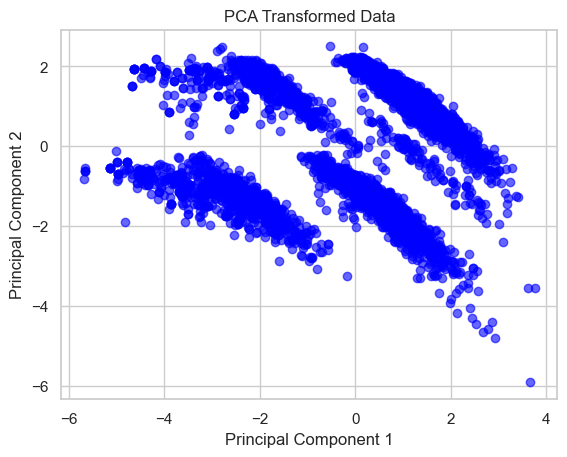

In [25]:
import numpy as np

def PCA(X, n_components):
    """
    Perform Principal Component Analysis (PCA) from scratch.

    Parameters:
        X: ndarray
            Input data of shape (n_samples, n_features).
        n_components: int
            Number of principal components to retain.

    Returns:
        X_pca: ndarray
            Transformed data of shape (n_samples, n_components).
        explained_variance: ndarray
            Variance explained by each principal component.
    """
    # Step 1: Standardize the data
    X_mean = np.mean(X, axis=0)
    X_centered = X - X_mean

    # Step 2: Compute the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # Step 3: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors by descending eigenvalues
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Step 5: Select the top n_components
    selected_vectors = eigenvectors[:, :n_components]

    # Step 6: Project the data onto the top n_components
    X_pca = np.dot(X_centered, selected_vectors)

    return X_pca, eigenvalues[:n_components]

# Example usage
  # 100 samples, 5 features

# Perform PCA to reduce to 2 components
X_pca, explained_variance = PCA(X_scaled, n_components=2)

print("Transformed Data Shape:", X_pca.shape)
print("Explained Variance:", explained_variance)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue', alpha=0.6)
plt.title("PCA Transformed Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()
